# MACHINE LEARNING

**Prediksi Nilai Ekspor & Impor Indonesia Berdasarkan Nilai Tukar Rupiah terhadap USD**

Proyek ini bertujuan untuk menganalisis dan memprediksi hubungan antara fluktuasi nilai tukar Rupiah (kurs beli & jual) terhadap kinerja ekspor dan impor non-migas Indonesia periode 2020–2024.

Dengan pendekatan machine learning (supervised learning), model regresi Linear dan Random Forest digunakan untuk mengevaluasi seberapa besar pengaruh kurs terhadap volume perdagangan internasional.

**Tujuan**
- Mendukung pengambilan keputusan berbasis data dalam kebijakan ekonomi dan perdagangan luar negeri.
- Menunjukkan keterampilan dalam pembersihan data, visualisasi korelasi, pemodelan regresi, dan interpretasi hasil dalam konteks Data Engineering.

**Tools & Teknologi**
- Python
- Google Colab
- pandas, seaborn, matplotlib, scikit-learn
- Linear Regression, Random Forest Regressor

**Hasil**
- Korelasi kurs dengan ekspor sangat lemah (0.034), dan dengan impor lemah hingga sedang (0.038).
- R² model regresi linier untuk ekspor: -0.0149, untuk impor: -0.0879
- R² model random forest untuk ekspor: -0.0042, untuk impor: -0.0499
- Prediksi menunjukkan bahwa kurs hanya berkontribusi kecil terhadap perubahan volume ekspor dan impor.

**Konteks Akademik**

Proyek ini dikembangkan sebagai bagian dari tugas mata kuliah Data Engineering, dengan fokus pada:

- Transformasi dan integrasi data ekonomi makro
- Implementasi supervised learning untuk prediksi numerik
- Pemodelan dan evaluasi hubungan antar variabel makroekonomi
- Penggabungan data multi-sumber menjadi insight kebijakan yang bermakna


In [43]:
# Import Library

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
# informasi dari Aiven
host = 'pg-3eaef719-dataengineering-kel4.j.aivencloud.com'
port = '26044'
database = 'defaultdb'
user = 'avnadmin'
password = 'AVNS_xOsSjlrmL3kwMTzS8GB'

# Buat connection string
connection_string = f'postgresql://{user}:{password}@{host}:{port}/{database}'

# Buat engine
engine = create_engine(connection_string)

df_dataEkposrImpor = pd.read_sql('SELECT * FROM "tabelEksporImpor"', engine)

In [46]:
df_dataEkposrImpor.head(5)

,HS,Uraian,Tahun,Nilai_Ekspor,Nilai_Impor,Kurs_Beli,Kurs_Jual
0,1.2020,Binatang hidup,2020,80.4,471.0,14499.142327,14644.862327
1,1.2021,Binatang hidup,2021,61.9,572.0,14241.573882,14384.705255
2,1.2022,Binatang hidup,2022,63.9,512.3,14772.302311,14920.767437
3,1.2023,Binatang hidup,2023,27.2,401.4,15178.775105,15331.325481
4,1.2024,Binatang hidup,2024,5.4,566.4,15767.665042,15926.133571


In [47]:
# MEngecek Isi nilai null

df_dataEkposrImpor.isnull().sum()

,0
HS,0
Uraian,0
Tahun,0
Nilai_Ekspor,0
Nilai_Impor,0
Kurs_Beli,0
Kurs_Jual,0


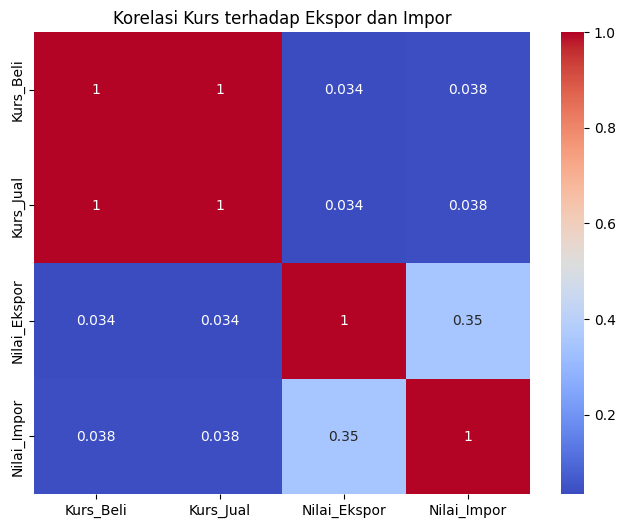

In [48]:
# Heatmap korelasi antara kurs dan ekspor-impor
plt.figure(figsize=(8,6))
sns.heatmap(df_dataEkposrImpor[['Kurs_Beli', 'Kurs_Jual', 'Nilai_Ekspor', 'Nilai_Impor']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Kurs terhadap Ekspor dan Impor")
plt.show()

In [49]:
# fitur dan target
features = ['Kurs_Beli', 'Kurs_Jual']
X = df_dataEkposrImpor[features]
y_ekspor = df_dataEkposrImpor['Nilai_Ekspor']
y_impor = df_dataEkposrImpor['Nilai_Impor']

In [50]:
# Split data untuk ekspor dan impor
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y_ekspor, test_size=0.2, random_state=42)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y_impor, test_size=0.2, random_state=42)

In [51]:
# Model Regresi Linier
lr_ekspor = LinearRegression().fit(X_train_e, y_train_e)
lr_impor = LinearRegression().fit(X_train_i, y_train_i)

In [52]:
# Model Random Forest
rf_ekspor = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_e, y_train_e)
rf_impor = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_i, y_train_i)

In [53]:
# Evaluasi Linear Regression Ekspor
print("=== Linear Regression Ekspor ===")
print("R²:", r2_score(y_test_e, lr_ekspor.predict(X_test_e)))
print("RMSE:", np.sqrt(mean_squared_error(y_test_e, lr_ekspor.predict(X_test_e))))
print("Intercept (α):", lr_ekspor.intercept_)
print("Slope Kurs_Beli (β1):", lr_ekspor.coef_[0])
print("Slope Kurs_Jual (β2):", lr_ekspor.coef_[1])

=== Linear Regression Ekspor ===
R²: -0.01492884488979107
RMSE: 6151.580233562059
Intercept (α): -811.9217499246406
Slope Kurs_Beli (β1): 1919592.4040260254
Slope Kurs_Jual (β2): -1900491.798432657


In [54]:
# Evaluasi Linear Regression Impor
print("\n=== Linear Regression Impor ===")
print("R²:", r2_score(y_test_i, lr_impor.predict(X_test_i)))
print("RMSE:", np.sqrt(mean_squared_error(y_test_i, lr_impor.predict(X_test_i))))
print("Intercept (α):", lr_impor.intercept_)
print("Slope Kurs_Beli (β1):", lr_impor.coef_[0])
print("Slope Kurs_Jual (β2):", lr_impor.coef_[1])


=== Linear Regression Impor ===
R²: -0.08796767941414063
RMSE: 2123.500294624109
Intercept (α): 3580.4590317083866
Slope Kurs_Beli (β1): 1484178.2828339294
Slope Kurs_Jual (β2): -1469410.4670670014


In [55]:
# Evaluasi Random Forest Ekspor
print("\n=== Random Forest Ekspor ===")
print("R²:", r2_score(y_test_e, rf_ekspor.predict(X_test_e)))


=== Random Forest Ekspor ===
R²: -0.004278938806701937


In [56]:
# Evaluasi Random Forest Impor
print("\n=== Random Forest Impor ===")
print("R²:", r2_score(y_test_i, rf_impor.predict(X_test_i)))


=== Random Forest Impor ===
R²: -0.049929312087700906


In [57]:
# Pentingnya fitur pada model ekspor
print("\nFeature Importance (Ekspor - Random Forest):")
for feat, imp in zip(features, rf_ekspor.feature_importances_):
    print(f"{feat}: {imp:.4f}")


Feature Importance (Ekspor - Random Forest):
Kurs_Beli: 0.5043
Kurs_Jual: 0.4957


In [58]:
# Pentingnya fitur pada model impor
print("\nFeature Importance (Impor - Random Forest):")
for feat, imp in zip(features, rf_impor.feature_importances_):
    print(f"{feat}: {imp:.4f}")


Feature Importance (Impor - Random Forest):
Kurs_Beli: 0.4674
Kurs_Jual: 0.5326


In [59]:
# Prediksi ekspor dan impor untuk nilai kurs tertentu
input_data = [[15800, 15700]]
pred_ekspor = lr_ekspor.predict(input_data)[0]
pred_impor = lr_impor.predict(input_data)[0]

print(f"\n Prediksi Ekspor (Linear Regression): {pred_ekspor:,.2f}")
print(f" Prediksi Impor (Linear Regression): {pred_impor:,.2f}")


 Prediksi Ekspor (Linear Regression): 491,837,936.30
 Prediksi Impor (Linear Regression): 380,276,116.28


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Kesimpulan**

Fluktuasi nilai tukar Rupiah terhadap USD tidak terbukti memiliki pengaruh yang kuat atau signifikan secara statistik terhadap nilai ekspor dan impor Indonesia pada periode 2020–2024 berdasarkan model machine learning yang dibangun.

Hal ini mengindikasikan bahwa faktor lain seperti:
* Harga komoditas global
* Permintaan dan kebijakan perdagangan luar negeri
* Biaya logistik dan transportasi
* Perjanjian dagang bilateral/multilateral

kemungkinan lebih berperan besar dalam memengaruhi kinerja ekspor dan impor Indonesia daripada fluktuasi kurs.